In [1]:
#Importing Libraries
import pandas as pd
import pprint

In [2]:
snp_500 = pd.read_csv("constituents_csv.csv")

In [3]:
list_of_ticker = snp_500["Symbol"].tolist()

In [4]:
#Importing robinhood API library
import robin_stocks.robinhood as rs

In [6]:
#Username and Password 

robin_user = input("Enter user name: ")
robin_user = input("Enter password: ")


rs.login(username=robin_user,
         password=robin_pass,
         expiresIn=86400,
         by_sms=True)



In [7]:
#Getting historical data
def hist_price(ticker):
    res = rs.stocks.get_stock_historicals(ticker, interval='hour', span='day', bounds='extended', info=None)
    open_price = float(res[0]['open_price'])
    close_price = float(res[-1]['close_price'])
    change = (close_price-open_price)/open_price
    return change

In [8]:
#price changed for all 500 stocks
dic_hist_price ={}
for i in list_of_ticker:
    dic_hist_price[i]=hist_price(i) 

In [9]:
#Top 10 changes yesterday
from heapq import nlargest
Top_10 = nlargest(10, dic_hist_price, key = dic_hist_price.get)

In [10]:
dict_top_10_hist = {}
for i in Top_10:
    dict_top_10_hist[i] = hist_price(i)

In [11]:
#Getting current price
def latest_price(ticker):
    res = rs.stocks.get_latest_price(ticker, priceType=None, includeExtendedHours=True)
    return round(float(res[0]),2)

In [12]:
#Hourly tracker(top 10)
dic_price_hourly ={}
for i in Top_10:
    dic_price_hourly[i]=latest_price(i)  

In [13]:
import matplotlib.pyplot as plt
from itertools import count
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


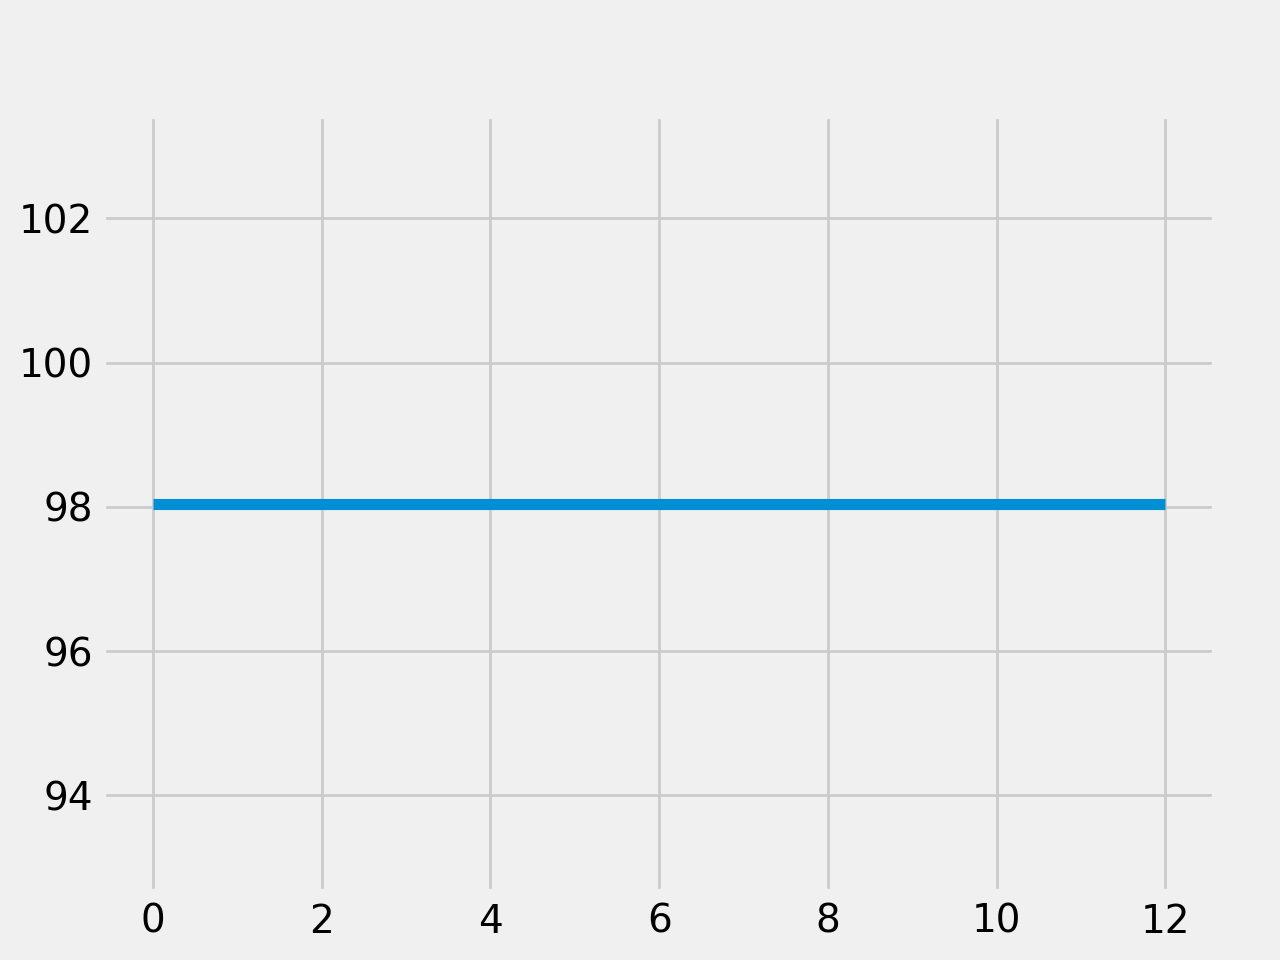

In [19]:
#Stock 1
%matplotlib notebook
plt.style.use('fivethirtyeight')
x_vals = []
y_vals = []
index = count()
def animate(i):
    x_vals.append(next(index))
    y_vals.append(latest_price(Top_10[0])) 
    
    plt.cla()
    plt.plot(y_vals)
    
   
ani = animation.FuncAnimation(plt.gcf(), animate, interval=1000)
plt.tight_layout()
plt.show()

In [79]:
y_vals

[]

In [23]:
plt.figure(figsize=((10,8)))
plt.style.use('fivethirtyeight')
x_vals = []
y_vals = []
index = count()
def animate(i):
    x_vals.append(next(index))
    y_vals.append(random.randint(0,5)) 
    
    plt.plot(y_vals)

ani = FuncAnimation(plt.gcf(),animate,interval =1000)
plt.tight_layout()
plt.show()

<Figure size 720x576 with 0 Axes>

Top 5 Stocks are ORCL AVGO CVS HRL HUM


<IPython.core.display.Javascript object>


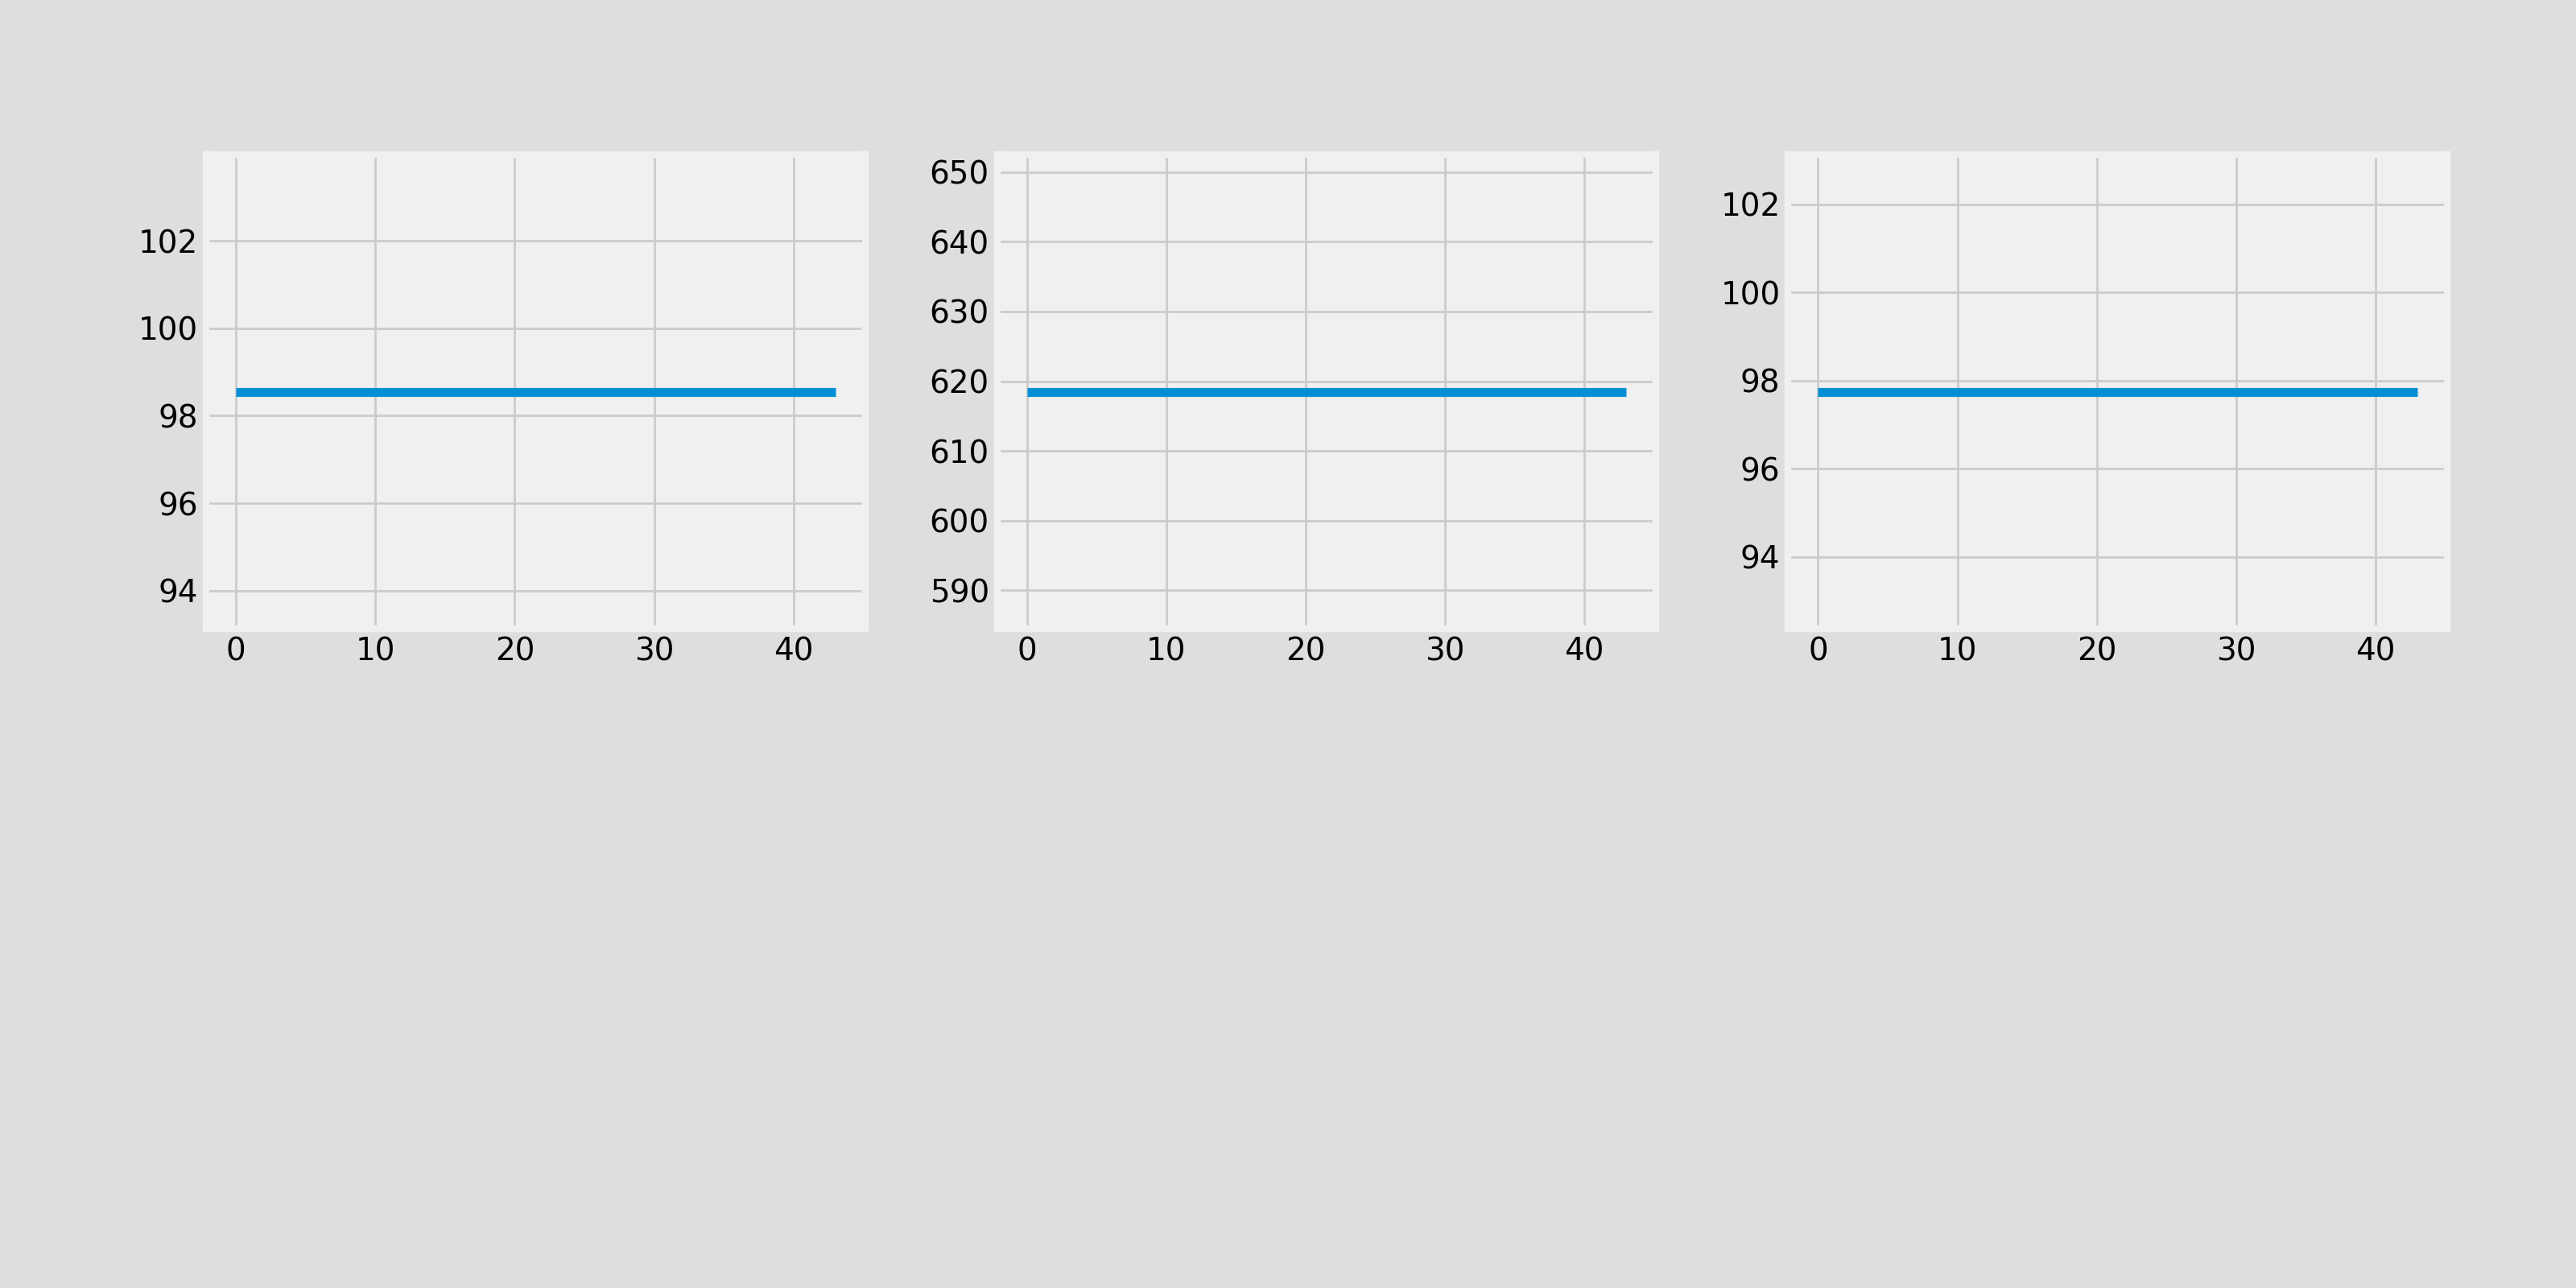

In [35]:
# from matplotlib.animation import FuncAnimation
print("Top 5 rising Stocks from yesterday are",Top_10[0],Top_10[1],Top_10[2],Top_10[3],Top_10[4])
import matplotlib.animation as animation
plt.style.use('fivethirtyeight')
stock1 =[]
stock2 =[]
stock3 =[]
# stock4 =[]
# stock5 =[]
# index = count()
def animate(i):
    stock1.append(latest_price(Top_10[0]))
    ax = plt.subplot(231)
    ax.cla()
    ax.plot(stock1)
    stock2.append(latest_price(Top_10[1]))
    ax1 = plt.subplot(232)
    ax1.cla()
    ax1.plot(stock2)
    stock3.append(latest_price(Top_10[2]))
    ax2 = plt.subplot(233)
    ax2.cla()
    ax2.plot(stock3)
#     stock4.append(latest_price(Top_10[3]))
#     ax3 = plt.subplot(234)
#     ax3.cla()
#     ax3.plot(stock4)
#     stock5.append(latest_price(Top_10[4]))
#     ax5 = plt.subplot(235)
#     ax4.cla()
#     ax5.plot(stock5)
          
fig = plt.figure(figsize=(16,8), facecolor='#DEDEDE')
ani = animation.FuncAnimation(plt.gcf(), animate, interval=1000)
plt.tight_layout()
plt.show()